### Implementing SVM with kernel and Random forest Classifier
### Compute performance metrics including accuracy, precision, recall, ROC curve, AUROC, PRC curve

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("wdbc.data", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
df.describe()


,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [54]:
#Separate the features from the label
X, y = df.iloc[:, 2:], df.iloc[:, 1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


SVM with RBF kernel: accuracy= 0.9532 recall= 0.9403 precision= 0.9403 AUROC= 0.9941


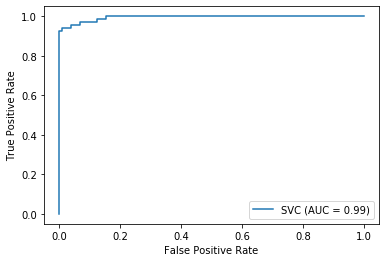

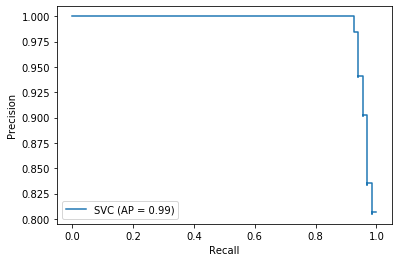

In [55]:
# Implement the SVM with rbf classifier

clf = SVC(C=1e4, kernel='rbf', random_state=100, gamma='scale',probability=True)
clf.fit(X_train, y_train)
# make predictions
y_pred=clf.predict(X_test)
# compute probabilities 
y_score=clf.predict_proba(X_test)[:,1]
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred,pos_label='M')
prc=precision_score(y_test,y_pred,pos_label='M')
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_score)
acc,rec,prc,auc = np.around(acc,4), np.around(rec,4),np.around(prc,4),np.around(auc,4)
print('SVM with RBF kernel: accuracy=',acc,'recall=',rec,'precision=',prc,"AUROC=",auc)
metrics.plot_roc_curve(clf, X_test, y_test)
metrics.plot_precision_recall_curve(clf, X_test, y_test)



RF: accuracy= 0.9298 recall= 0.8955 precision= 0.9231 AUROC= 0.9854


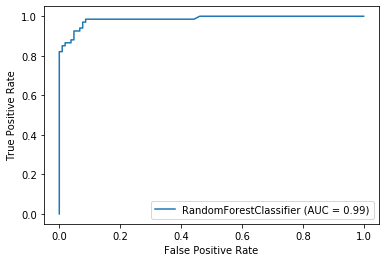

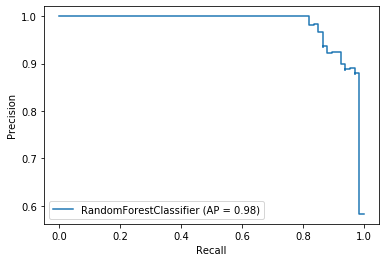

In [56]:
# Implement the Random forest classifier

clf = RandomForestClassifier(max_depth=1, random_state=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_score=clf.predict_proba(X_test)[:,1]
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred,pos_label='M')
prc=precision_score(y_test,y_pred,pos_label='M')
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score, pos_label='M')
auc = metrics.roc_auc_score(y_test, y_score)
acc,rec,prc,auc = np.around(acc,4), np.around(rec,4),np.around(prc,4),np.around(auc,4)
print('RF: accuracy=',acc,'recall=',rec,'precision=',prc,"AUROC=",auc)
metrics.plot_roc_curve(clf, X_test, y_test)
metrics.plot_precision_recall_curve(clf, X_test, y_test)